## Load MNIST on Python 3.x

In [2]:
import pickle
import gzip

## Load USPS on Python 3.x

In [3]:
from PIL import Image
import os
import numpy as np

## MNIST Data PreProcessing

In [5]:
filename = 'mnist.pkl.gz'
f = gzip.open(filename, 'rb')
training_data, validation_data, test_data = pickle.load(f, encoding='latin1')
f.close()
training_input= training_data[0]
training_target= training_data[1]
validation_input= validation_data[0]
validation_target=validation_data[1]
test_input= test_data[0]
test_target= test_data[1]

## USPS Data PreProcessing

In [6]:
USPSMat  = []
USPSTar  = []
curPath  = 'USPSdata/Numerals'
savedImg = []

for j in range(0,10):
    curFolderPath = curPath + '/' + str(j)
    imgs =  os.listdir(curFolderPath)
    for img in imgs:
        curImg = curFolderPath + '/' + img
        if curImg[-3:] == 'png':
            img = Image.open(curImg,'r')
            img = img.resize((28, 28))
            savedImg = img
            imgdata = (255-np.array(img.getdata()))/255
            USPSMat.append(imgdata)
            USPSTar.append(j)
            
print("All images loaded successfully")

All images loaded successfully


## Confusion Matrix

In [45]:
def CreateConfusionMatrix(predicted,actual):
    confusion_matrix = np.zeros((10,10),dtype=int)
    for i in range(len(predicted)):
        confusion_matrix[int(predicted[i])][int(actual[i])] +=1
    return confusion_matrix

## Logistic Regression with Backpropagation

In [17]:
#Function to compute Soft Max of the Activation A
def SoftMax(target):
    output = np.zeros(target.shape)
    imax=len(target)
    for i in range(imax):
        den = float(np.sum(np.exp(target[i]))) #Computes Denominator of the Softmax function for one target example
        for j in range(10):
            output[i][j] = np.exp(target[i][j])/den # Computes probability for each class p(C/X)
    return output

# Function to convert target values to one-hot encoded representation
def OneHotEncoder(target):
    one_hot_target=np.zeros((len(target),10),dtype=int)
    for i in range(len(target)):
        #Below statement assigns 1 to the position depending on the value in the target value
        one_hot_target[i][target[i]]=1
    return one_hot_target

# Funct
def ComputeWeights(inp, one_hot_target):
    W = np.zeros((inp.shape[1],10)) # Initialize weights to zeros
    B= 50
    inp_transpose=inp.transpose()
    eta=2
    tmpli=[]
    for i in range(0,500):
        A = np.add(np.dot(inp,W),B)
        Y = SoftMax(A)
        YminusT=np.add(Y,-1*one_hot_target)
        Error_fn_Gradient= 1*np.dot(inp_transpose,YminusT)
        W = W - (1/inp.shape[0]) * (eta *Error_fn_Gradient)
        print(i,end=",")
        
        
        
        tmpli.append([i,TestLogistic(inp,W)])
        
    return W,tmpli
def TestAccuracy(predicted,actual):
    return str((sum(predicted==actual)/len(actual))*100)+"%"
def AddBias(input_features):
    return np.insert(input_features,0,1,axis=1)

In [39]:
def TrainLogistic(training_input, training_target):
    one_hot_target=OneHotEncoder(training_target) # Compute One Hot Target Matrix
    input_with_bias = AddBias(training_input) # Add bias to the input
    W = ComputeWeights(input_with_bias, one_hot_target)
    return W

def TestLogistic(input_features,W):
    input_with_bias = AddBias(input_features)
    A = np.add(np.dot(input_with_bias,W),0)
    Y = SoftMax(A)
    prediction = np.argmax(Y, axis=1)
    return prediction

In [21]:
W,tmpli = TrainLogistic(training_input, training_target)

0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,27

In [27]:
#print(tmpli)
tmpout = []
for i in range(len(tmpli)):
    tmpout.append([tmpli[i][0], TestAccuracy(tmpli[i][1],training_target)])

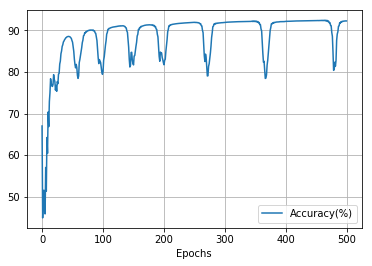

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.DataFrame(tmpout, columns=['Epochs','Accuracy(%)'])
#print(df1)
df.plot(grid=True,x='Epochs',y='Accuracy(%)')


#### Testing MNIST Data

In [40]:
predicted_MNIST_train = TestLogistic(training_input,W)
predicted_MNIST_valid = TestLogistic(validation_input,W)
predicted_MNIST_test = TestLogistic(test_input,W)
Accuracy_MNIST_train = TestAccuracy(predicted_MNIST_train, training_target)
Accuracy_MNIST_valid = TestAccuracy(predicted_MNIST_valid, validation_target)
Accuracy_MNIST_test = TestAccuracy(predicted_MNIST_test, test_target)
print("Accuracy for MNIST Data")
print("Accuracy Training Data : ", Accuracy_MNIST_train)
print("Accuracy Validation Data : ", Accuracy_MNIST_valid)
print("Accuracy Testing Data : ", Accuracy_MNIST_test)

Accuracy for MNIST Data
Accuracy Training Data :  92.29
Accuracy Validation Data :  92.47
Accuracy Testing Data :  92.06


#### Testing USPS data

In [41]:
predicted_USPS= TestLogistic(USPSMat,W)
Accuracy_USPS = TestAccuracy(predicted_USPS,USPSTar)
print("Accuracy USPS : ", Accuracy_USPS)

Accuracy USPS :  34.28171408570429


#### Printing Confusion Matrix for MNIST and USPS

In [60]:
print("       CONFUSION MATRIX for MNIST Test Data")
print("              Logistic Regression")
print("           Rows    -----> Predicted Values")
print("           Columns -----> Actual Values")
print(CreateConfusionMatrix(predicted_MNIST_test,test_target))

       CONFUSION MATRIX for MNIST Test Data
              Logistic Regression
           Rows    -----> Predicted Values
           Columns -----> Actual Values
[[ 957    0    6    2    1    9   11    3    6   11]
 [   0 1110    8    0    3    3    3    7    6    6]
 [   3    3  924   23    5    5    6   22    7    2]
 [   1    2   14  914    1   34    1    9   27   11]
 [   0    0   10    0  910    9   10    6   10   33]
 [   5    2    5   31    0  771   12    1   27    9]
 [  10    4   11    2   11   18  911    0   11    0]
 [   1    2   11   11    3    8    2  949   12   29]
 [   3   12   34   17    7   28    2    1  859    7]
 [   0    0    9   10   41    7    0   30    9  901]]


In [64]:
print("          CONFUSION MATRIX for USPS Data")
print("                Logistic Regression")
print("           Rows    -----> Predicted Values")
print("           Columns -----> Actual Values")
print(CreateConfusionMatrix(predicted_USPS,USPSTar))

          CONFUSION MATRIX for USPS Data
                Logistic Regression
           Rows    -----> Predicted Values
           Columns -----> Actual Values
[[ 490   71   93   49   41   73  130  108  159   19]
 [   1  325   12    3   43   11    6  130   18   72]
 [ 221  259 1296  215   53  226  567  192  158  120]
 [  93  190  127 1056   38  158   74  556  314  521]
 [ 143  188   29    7  858   23   56   51   84  107]
 [ 365  208  265  533  226 1329  488  257  793  127]
 [  58   14   51    6   29   54  597    8  105   14]
 [ 169  597   59   72  332   71   19  472   79  538]
 [ 103  116   37   31  205   39   15  159  226  275]
 [ 357   32   30   28  175   16   48   67   64  207]]


## MNIST Neural Network

In [89]:
import keras
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential
import pandas as pd
num_classes=10
image_vector_size=28*28
x_train = np.concatenate((training_input, validation_input),axis=0)
y_train = OneHotEncoder(np.concatenate((training_target, validation_target),axis=0))
x_test = test_input
y_test = OneHotEncoder(test_target)
image_size = 784
model = Sequential()
model.add(Dense(units=32, activation='sigmoid', input_shape=(image_size,)))
model.add(Dense(units=num_classes, activation='softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=128, epochs=500, verbose=False,validation_split=0.1)

In [90]:
print("Accuracy of Neural Network Implementation")
loss_mnist_test,accuracy_mnist_test = model.evaluate(x_test, y_test, verbose=False) 
loss_usps_test,accuracy_usps_test = model.evaluate(np.array(USPSMat), OneHotEncoder(USPSTar), verbose=False)


Accuracy of Neural Network Implementation
Accuracy MNIST Test Data :  0.9553
Accuracy USPS Data :  0.40107005349820457


In [106]:
predicted_mnist_test = np.argmax(model.predict(x_test), axis=1) 

predicted_usps_test = np.argmax(model.predict(np.array(USPSMat)), axis=1)
print("Accuracy MNIST Test Data : ", accuracy_mnist_test)
print("Accuracy USPS Data : ", accuracy_usps_test)

Accuracy MNIST Test Data :  0.9553
Accuracy USPS Data :  0.40107005349820457
(array([7, 2, 1, ..., 4, 5, 6], dtype=int64), array([5, 5, 5, ..., 9, 3, 3], dtype=int64))


In [111]:
print("       CONFUSION MATRIX for MNIST Test Data")
print("              Neural Network")
print("           Rows    -----> Predicted Values")
print("           Columns -----> Actual Values")
print(CreateConfusionMatrix(predicted_mnist_test,np.argmax(y_test,axis=1)))

       CONFUSION MATRIX for MNIST Test Data
              Neural Network
           Rows    -----> Predicted Values
           Columns -----> Actual Values
[[ 962    0    7    2    1    7    9    1    9    7]
 [   0 1120    2    1    0    2    2    7    2    6]
 [   1    3  989   11    5    2    2   14    1    0]
 [   1    1    5  955    0   22    2    7   16   11]
 [   0    1    6    0  939    3    6    4    3   18]
 [   3    1    3   15    2  824    7    0    9    7]
 [   6    3    6    1    6   13  922    0    6    2]
 [   5    2    6   12    4    2    2  979    6   11]
 [   2    4    6   11    3   16    6    2  919    3]
 [   0    0    2    2   22    1    0   14    3  944]]


In [108]:
print("          CONFUSION MATRIX for USPS Data")
print("                Neural Network")
print("           Rows    -----> Predicted Values")
print("           Columns -----> Actual Values")
print(CreateConfusionMatrix(predicted_usps_test,USPSTar))

          CONFUSION MATRIX for USPS Data
                Neural Network
           Rows    -----> Predicted Values
           Columns -----> Actual Values
[[ 477   61  116   51   17   82  189   37  124   11]
 [   0  280    8    0   10    4    6   83    5   24]
 [ 154  301 1374  124   43  198  489  163  122   85]
 [ 114  107  159 1380   53  181   77  637  371  429]
 [ 174  188   38    1  953   16   55   24   75   87]
 [ 204  154  137  315  164 1296  263  201  595   74]
 [  53   32   48    3   25   43  799    5   78    8]
 [ 180  691   46   48  385   76   30  684   74  666]
 [ 166  102   58   62  191   90   44  131  499  337]
 [ 478   84   15   16  159   14   48   35   57  279]]


In [109]:

print(y_test)

[[0 0 0 ... 1 0 0]
 [0 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## Support Vector Machines

In [75]:
import numpy as np
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import fetch_mldata
X_train = np.concatenate((training_data[0],validation_data[0]),axis=0)
y_train = np.concatenate((training_data[1],validation_data[1]),axis=0)
X_test, y_test = test_data[0], test_data[1]

In [76]:
classifier1 = SVC(kernel='linear', C=2, gamma = 0.05);
classifier1.fit(X_train, y_train)

SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.05, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [77]:
#Testing on MNIST Test data
predicted_svm_mnist = classifier1.predict(X_test)
Accuracy_svm_mnist = TestAccuracy(predicted_svm_mnist,y_test)
print("Accuracy MNIST Test : ",Accuracy_svm_mnist)

Accuracy MNIST Test :  93.81


In [78]:
#Testing on USPS data
predicted_svm_usps = classifier1.predict(USPSMat)
Accuracy_svm_usps = TestAccuracy(predicted_svm_usps,USPSTar)
print("Accuracy USPS : ",Accuracy_svm_usps)

Accuracy USPS :  28.451422571128553


In [80]:
print("       CONFUSION MATRIX for MNIST Test Data")
print("              SVM")
print("           Rows    -----> Predicted Values")
print("           Columns -----> Actual Values")
print(CreateConfusionMatrix(predicted_svm_mnist,y_test))

       CONFUSION MATRIX for MNIST Test Data
              SVM
           Rows    -----> Predicted Values
           Columns -----> Actual Values
[[ 956    0    5    4    1   11    6    2    8    7]
 [   0 1117    7    0    1    5    3    8    5    7]
 [   4    5  969   15    9    5   14   21    6    3]
 [   1    3   11  950    0   37    2   12   28   13]
 [   1    0    2    1  943    6    6    7    7   32]
 [   8    1    4   19    2  794   18    2   26    5]
 [   7    2    7    1    5   12  906    0    8    1]
 [   1    1    9    7    1    2    1  956    6   18]
 [   0    6   16   11    2   15    2    2  872    5]
 [   2    0    2    2   18    5    0   18    8  918]]


In [81]:
print("          CONFUSION MATRIX for USPS Data")
print("                SVM")
print("           Rows    -----> Predicted Values")
print("           Columns -----> Actual Values")
print(CreateConfusionMatrix(predicted_svm_usps,USPSTar))

          CONFUSION MATRIX for USPS Data
                SVM
           Rows    -----> Predicted Values
           Columns -----> Actual Values
[[ 360   46  118   50   23   37  144   27  115   11]
 [   1  294   70   60   23   17   20   75   14   31]
 [ 528  560 1269  390  249  699  853  218  360  212]
 [ 168  205  104  795   98  218   63  639  466  608]
 [ 156  253   35    9  765   29   68   49   90  122]
 [ 321  204  261  588  216  892  338  274  655  100]
 [  77   20   67    8   19   30  443   11   65    4]
 [ 194  358   40   53  456   32   32  575   65  606]
 [   8   44   22   34   87   33    2  102  142  151]
 [ 187   16   13   13   64   13   37   30   28  155]]


## RandomForest 

In [71]:
classifier2 = RandomForestClassifier(n_estimators=100);
classifier2.fit(X_train, y_train) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [72]:
print("Accuracy for Random Forest")
y_predicted_rf_mnist = classifier2.predict(X_test)
Accuracy_MNIST_test=TestAccuracy(y_predicted_rf_mnist,y_test)
y_predicted_rf_usps = classifier2.predict(USPSMat)
Accuracy_USPS=TestAccuracy(y_predicted_rf_usps,USPSTar)
print("Accuracy for MNIST Test Data : ",Accuracy_MNIST_test)
print("Accuracy for USPS Data : ",Accuracy_USPS)

Accuracy for Random Forest
Accuracy for MNIST Test Data :  96.89
Accuracy for USPS Data :  39.91699584979249


In [73]:
print("       CONFUSION MATRIX for MNIST Test Data")
print("              Random Forest")
print("           Rows    -----> Predicted Values")
print("           Columns -----> Actual Values")
print(CreateConfusionMatrix(y_predicted_rf_mnist,y_test))

       CONFUSION MATRIX for MNIST Test Data
              Random Forest
           Rows    -----> Predicted Values
           Columns -----> Actual Values
[[ 971    0    6    0    1    2    7    2    3    5]
 [   0 1123    0    0    0    2    3    2    0    5]
 [   1    3  999   11    1    1    1   21    6    2]
 [   0    3    5  974    0   12    0    1   13   10]
 [   0    0    3    0  957    3    5    1    3   10]
 [   1    2    0    7    0  855    3    0    7    5]
 [   4    2    4    0    4    5  935    0    3    1]
 [   1    0    9    8    1    2    0  991    3    7]
 [   2    1    6    7    3    7    4    2  926    6]
 [   0    1    0    3   15    3    0    8   10  958]]


In [74]:
print("          CONFUSION MATRIX for USPS Data")
print("                Random Forest")
print("           Rows    -----> Predicted Values")
print("           Columns -----> Actual Values")
print(CreateConfusionMatrix(y_predicted_rf_usps,USPSTar))

          CONFUSION MATRIX for USPS Data
                Random Forest
           Rows    -----> Predicted Values
           Columns -----> Actual Values
[[ 631   49   83   39   12  132  293   42   54   20]
 [  13  579   24    4  202   30   48  342   55  273]
 [ 282  145 1296  113   67  149  251  418  173  251]
 [  51   94   86 1234   32   88   35  233  218  282]
 [ 457   60   50   52 1091   33   86   40  100  252]
 [ 134   87  184  374  147 1404  346  191 1037  132]
 [  84   24   22    3   21   37  807   35   67   16]
 [ 115  946  241  158  381  110  113  685  106  592]
 [   1   13    8    6   32    8    9    3  160   86]
 [ 232    3    5   17   15    9   12   11   30   96]]


In [135]:
def Ensemble(predicted_log, predicted_nn, predicted_svm, predicted_rf):
    num_of_rows = predicted_log.shape[0]
    ensemble_input = np.concatenate((predicted_log.reshape(num_of_rows,1), predicted_nn.reshape(num_of_rows,1), predicted_svm.reshape(num_of_rows,1), predicted_rf.reshape(num_of_rows,1)),axis=1)
    ensemble_output= []
    for i in range(len(ensemble_input)):
        bin_count = np.bincount(ensemble_input[i])
        ensemble_output.append(np.argmax(bin_count))
    return ensemble_output

In [140]:
ensemble_output_mnist_test = Ensemble(predicted_MNIST_test, predicted_mnist_test,predicted_svm_mnist,y_predicted_rf_mnist)
ensemble_output_usps = Ensemble(predicted_USPS, predicted_usps_test,predicted_svm_usps,y_predicted_rf_usps)
accuracy_mnist_test = TestAccuracy(ensemble_output_mnist_test, test_target)
accuracy_usps = TestAccuracy(ensemble_output_usps, np.array(USPSTar))
print("Accuracy for Ensemble of All Classifiers")
print("Accuracy for MNIST Test Data : ", accuracy_mnist_test)
print("Accuracy for USPS Data : ", accuracy_usps)

Accuracy for Ensemble of All Classifiers
Accuracy for MNIST Test Data :  95.45
Accuracy for USPS Data :  37.5918795939797


In [144]:
print("       CONFUSION MATRIX for MNIST Test Data")
print("              Ensemble")
print("           Rows    -----> Predicted Values")
print("           Columns -----> Actual Values")
print(CreateConfusionMatrix(ensemble_output_mnist_test,test_target))

       CONFUSION MATRIX for MNIST Test Data
              Ensemble
           Rows    -----> Predicted Values
           Columns -----> Actual Values
[[ 970    0    8    2    1    8    8    2    6    9]
 [   0 1124    3    0    0    3    3    6    2    6]
 [   1    2  990   17    5    1    7   22    4    2]
 [   1    2    5  963    0   29    1    7   22   14]
 [   0    0    4    0  955    6    7    3    5   25]
 [   2    1    1   11    0  822   11    1   17    5]
 [   4    2    4    0    3   10  917    0    8    0]
 [   1    1    9    9    0    1    2  975    7   16]
 [   1    3    7    7    3   10    2    1  899    2]
 [   0    0    1    1   15    2    0   11    4  930]]


In [145]:
print("          CONFUSION MATRIX for USPS Data")
print("                Ensemble")
print("           Rows    -----> Predicted Values")
print("           Columns -----> Actual Values")
print(CreateConfusionMatrix(ensemble_output_usps,USPSTar))

          CONFUSION MATRIX for USPS Data
                Ensemble
           Rows    -----> Predicted Values
           Columns -----> Actual Values
[[ 567   71  117   51   23   86  203   59  143   17]
 [   4  389   20    8   60   11   13  161   21   92]
 [ 323  312 1437  233  102  292  618  242  208  169]
 [ 100  163  106 1244   46  171   68  584  380  515]
 [ 223  181   28    2 1004   17   58   34   76  109]
 [ 233  177  169  382  197 1302  344  233  788   99]
 [  45   18   34    2   14   28  629    6   59    8]
 [ 142  627   57   44  334   58   27  564   72  594]
 [  49   48   18   26  131   25    7   94  220  235]
 [ 314   14   13    8   89   10   33   23   33  162]]
